# Health Survey Data Analysis

Jaehak Kim

## Executive Summary

A report on health survey data using inferential statistics and data cleaning. Answering whether there is distinctive difference in the number of sick days between the people who own versus who rent their home.

## The Data

- Data is a health data from the CDC Behavioral Risk Factor Surveillance Systems.The subset of the data being used represents survey responses from the 2020-2021 survey in the state of New York. 
- `PHYSHLTH` represents how many days each respondent was physically not healthy.
- `RENTHOM1` represents whether each respondent was owning or renting a residence.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns


file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

In [2]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,36,11,11172020,11,17,2020,1200,2020000001,2020000001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,36,1,1182020,1,18,2020,1200,2020000002,2020000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,36,4,5042020,5,4,2020,1200,2020000003,2020000003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,36,1,1222020,1,22,2020,1200,2020000004,2020000004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,36,3,3102020,3,10,2020,1200,2020000005,2020000005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
my_df = df[['PHYSHLTH', 'RENTHOM1']]
my_df.head()

,PHYSHLTH,RENTHOM1
0,88.0,2.0
1,14.0,1.0
2,88.0,2.0
3,5.0,3.0
4,88.0,2.0


## Data Preparation

Data will be prepared and cleaned to make statistical calculations and visualizations possible. Conversion of data types, selection of the rows relevant to current project will be performed.


In [4]:
#converting data type from float to integer
my_df = my_df.astype(int)

In [5]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14769 entries, 0 to 14768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PHYSHLTH  14769 non-null  int64
 1   RENTHOM1  14769 non-null  int64
dtypes: int64(2)
memory usage: 230.9 KB


In [6]:
my_df.value_counts()

PHYSHLTH  RENTHOM1
88        1           6401
          2           3614
          3            394
30        1            389
          2            336
                      ... 
26        3              1
          2              1
          1              1
22        2              1
15        7              1
Length: 114, dtype: int64

In [7]:
#88 needs to be converted 0 since it represents no sick days
my_df['PHYSHLTH'] = my_df['PHYSHLTH'].replace(to_replace = 88,value = 0)

In [8]:
#since 'PHYSHLTH' is asking last 30 days of sick days
my_df = my_df[my_df['PHYSHLTH'] <= 30]

In [9]:
# since 1 is who own and 2 is who rent
my_df = my_df[my_df['RENTHOM1'] <= 2]

In [10]:
my_df.head()

,PHYSHLTH,RENTHOM1
0,0,2
1,14,1
2,0,2
4,0,2
5,2,2


In [11]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13659 entries, 0 to 14767
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PHYSHLTH  13659 non-null  int64
 1   RENTHOM1  13659 non-null  int64
dtypes: int64(2)
memory usage: 320.1 KB


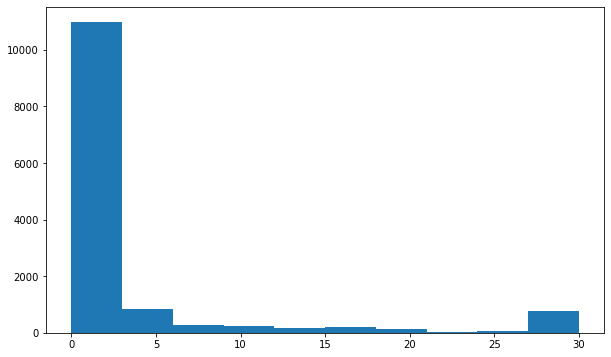

In [12]:
plt.figure(figsize = (10,6))
plt.hist(my_df['PHYSHLTH']);

## Confidence Interval for Mean of `PHYSHLTH`

In [13]:
# a 95% confidence interval about the mean of PHYSHLTH
s_mean = my_df['PHYSHLTH'].mean()
s_size = len(df['PHYSHLTH'])
s_std = my_df['PHYSHLTH'].std()
se = s_std/np.sqrt(s_size)

In [15]:
stats.t.interval(alpha=.95, loc=s_mean, scale=se, df=s_size-1)

(2.9423666304209317, 3.1869254114562184)

We are 95% confident that the population parameter is between 2.9423666304209317 and 3.1869254114562184

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

Basically splitting the data on 'RENTHOM1' means by creating two subsets to distinguish between those who own their home and those who rent their home. And to see whether it makes difference in their health status(number of sick days) based on their residential status (own or rent). 

In [16]:
df_own = my_df[my_df['RENTHOM1'] == 1]
df_rent = my_df[my_df['RENTHOM1'] == 2]
df_own.info()
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8453 entries, 1 to 14762
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PHYSHLTH  8453 non-null   int64
 1   RENTHOM1  8453 non-null   int64
dtypes: int64(2)
memory usage: 198.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5206 entries, 0 to 14767
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PHYSHLTH  5206 non-null   int64
 1   RENTHOM1  5206 non-null   int64
dtypes: int64(2)
memory usage: 122.0 KB


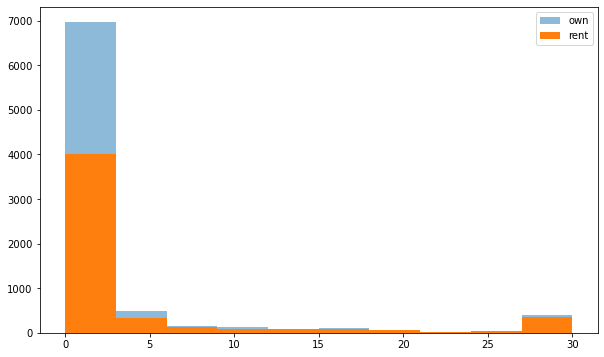

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(df_own['PHYSHLTH'], label= 'own', alpha=.5)
ax.hist(df_rent['PHYSHLTH'], label= 'rent')
ax.legend();

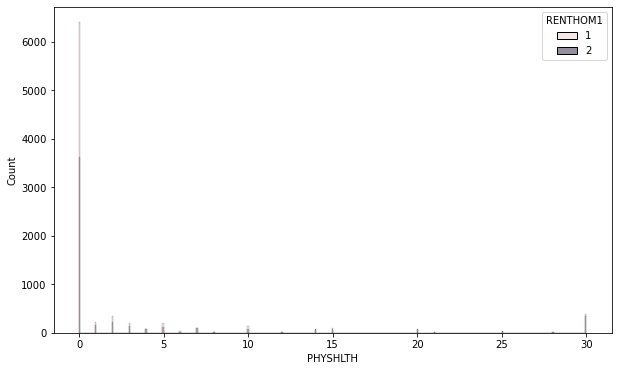

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=my_df, x='PHYSHLTH', hue='RENTHOM1', ax=ax);

- Plots above show that there is a definite increase of no sick days among who own their home. 
- number of sick days between who own and who rent is similar between 5 and 30 days of sick days. 

### Is the Difference Statistically Significant?

- Null: There is no significant difference between the average sick days of those who own and the average sick days of those who rent.
- Alternative: There is a significant difference between the average sick days of those who own and the average sick days of those who rent.
- This calls for two-tailed test because it's not a greater than or less than configuration.

In [19]:
# the test statistic and p-value for a t-test
own_sample = df_own['PHYSHLTH']
rent_sample = df_rent['PHYSHLTH']

In [23]:
print("Variance of own sample: ", own_sample.var())
print("Variance of rent sample: ", rent_sample.var())

Variance of own sample:  50.53618574887982
Variance of rent sample:  68.11328600745938


In [21]:
results = stats.ttest_ind(rent_sample, own_sample, equal_var=False, alternative='two-sided')
results

Ttest_indResult(statistic=7.388322797834266, pvalue=1.6084644296491685e-13)

In [22]:
p_val = results[1]
print('P value of t test: ', p_val)

P value of t test:  1.6084644296491685e-13


Since P value is significantly lower than the alpha of 0.05 we can safely reject the null hypothesis. This implies that your alternative hypothesis is correct, and that the data is significant.

## Next Steps

I would investigate next what effects 'Label: Could Not See Doctor Because of Cost' has on people's health condition. 